In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
mnist = keras.datasets.mnist
((train_images, train_labels) , (test_images, test_labels)) = mnist.load_data()

In [5]:
#데이터 28x28 확인 
print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")
print(f"test__images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")
print(train_images.dtype) #타입도 확인

train_images: (60000, 28, 28)
train_labels: (60000,)
test__images: (10000, 28, 28)
test_labels: (10000,)
uint8


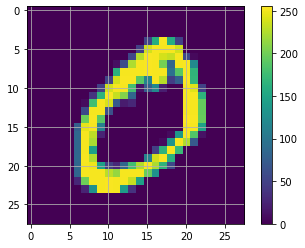

0


In [4]:
#데이터 확인
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(True)
plt.show()
print(train_labels[1])

In [8]:
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]


In [9]:
#데이터 범위가 255까지 맞는지 확인
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)) )
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)) )

255 0
255 0


In [10]:
# 수동 노말라이즈!
train_images = train_images / 255
test_images = test_images / 255

In [12]:
#데이터 범위가 0~1 맞는지 확인
print(max(train_images.reshape(-1)), min(train_images.reshape(-1)) )
print(max(test_images.reshape(-1)), min(test_images.reshape(-1)) )

#아까확인한 0이아닌값들이 어떻게 변했는지도 확인
print(list(filter(lambda x: x != 0, train_images[0].reshape(-1)))[:10])

1.0 0.0
1.0 0.0
[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]


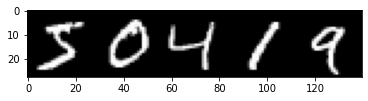

[5 0 4 1 9]


In [23]:
plt.imshow(train_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap='gray')
plt.show()
print(train_labels[:5])

In [30]:
# 노이즈 데이터 augmentation
# 한 개의 데이터로 먼저 테스트

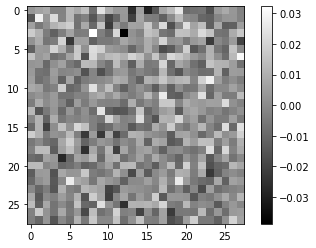

In [24]:
plt.imshow(np.random.normal(0.0, 0.01, (28, 28)), cmap="gray")
plt.colorbar()
plt.show()

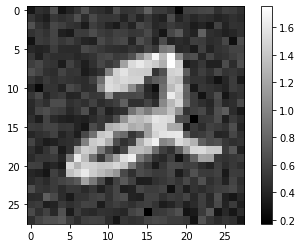

In [27]:
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28, 28))
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

In [28]:
print(max(noisy_image.reshape(-1)), min(noisy_image.reshape(-1)) )
#1이 넘네??? 1이 넘는 값은 1로 대체하자! 

1.75270372776998 0.17246487552806422


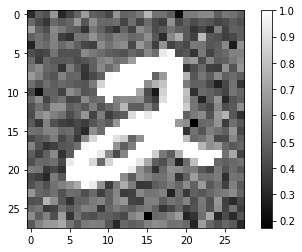

In [29]:
noisy_image[noisy_image > 1.0] = 1.0
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

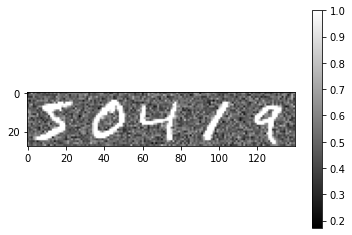

In [31]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0
test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

#잘 됐는지 확인 
plt.imshow(train_noisy_images[:5].transpose( (1, 0, 2) ).reshape(28, -1), cmap="gray")
plt.colorbar()
plt.show()

In [37]:
from tensorflow.keras.utils import to_categorical

In [40]:
print(train_labels.shape, test_labels.shape)
train_labels = to_categorical( train_labels, 10)
test_labels = to_categorical( test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [41]:
#모델링 준비 끝

---

In [42]:
# input (28, 28), simple RNN, 10 class, fully-conntect
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

In [43]:
inputs = Input(shape=(28, 28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)

2022-09-26 19:13:23.866188: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:13:23.866454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:13:23.866670: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:13:23.920434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:13:23.920718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [44]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics = ["accuracy"])

In [46]:
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)

Epoch 1/5


2022-09-26 19:14:07.806365: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 - 19s - loss: 0.7135 - accuracy: 0.7649 - val_loss: 0.4279 - val_accuracy: 0.8722 - 19s/epoch - 10ms/step
Epoch 2/5
1875/1875 - 17s - loss: 0.3735 - accuracy: 0.8881 - val_loss: 0.3251 - val_accuracy: 0.9012 - 17s/epoch - 9ms/step
Epoch 3/5
1875/1875 - 17s - loss: 0.3047 - accuracy: 0.9082 - val_loss: 0.2614 - val_accuracy: 0.9228 - 17s/epoch - 9ms/step
Epoch 4/5
1875/1875 - 17s - loss: 0.2689 - accuracy: 0.9212 - val_loss: 0.2616 - val_accuracy: 0.9224 - 17s/epoch - 9ms/step
Epoch 5/5
1875/1875 - 17s - loss: 0.2489 - accuracy: 0.9283 - val_loss: 0.2191 - val_accuracy: 0.9368 - 17s/epoch - 9ms/step


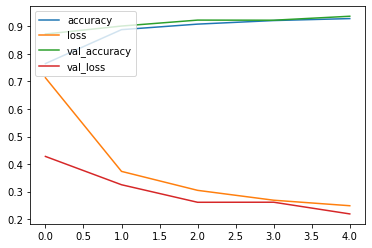

In [47]:
# hist! 
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

---

In [48]:
#학습이 잘 됐나?

In [49]:
res = model.predict( test_noisy_images[3:4] ) 

In [50]:
res

array([[9.9295878e-01, 2.6111684e-07, 1.8821502e-03, 1.6553202e-03,
        1.3156377e-05, 3.2198225e-04, 1.9942271e-03, 3.8627244e-05,
        7.0315594e-04, 4.3239776e-04]], dtype=float32)

In [51]:
res.shape

(1, 10)

---

### 코드 테스트들

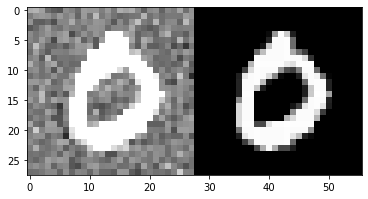

In [53]:
plt.imshow(np.concatenate([test_noisy_images[3], test_images[3]], axis=1) , cmap="gray")
plt.show()

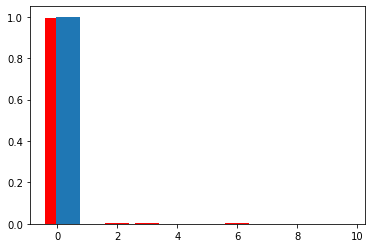

In [54]:
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, test_labels[3]) #겹쳐서 안보이니까 이렇게라도 .. 
plt.show()

In [ ]:
# 모델 저장 
model.save("./mnist.h5")

#코랩도 가능
# from google.colab import files
# files.download('./mnist.h5')

In [ ]:
# 모델 불러오기 
new_model = tf.keras.models.load_model('./mnist.h5')

In [ ]:
# new model로 테스트데이터 평가
loss, acc = new_model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)
loss, acc = model.evaluate(test_noisy_images, test_labels, verbose=2)
print(loss, acc)